To run this example locally, [install Ploomber](https://ploomber.readthedocs.io/en/latest/get-started/install.html) and execute: `ploomber examples -n templates/spec-api-sql`

To start a free, hosted JupyterLab: [![binder-logo](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ploomber/binder-env/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fploomber%252Fprojects%26urlpath%3Dlab%252Ftree%252Fprojects%252Ftemplates/spec-api-sql%252FREADME.ipynb%26branch%3Dmaster)

Found an issue? [Let us know.](https://github.com/ploomber/projects/issues/new?title=templates/spec-api-sql%20issue)

Have questions? [Ask us anything on Slack.](https://ploomber.io/community/)



# SQL/Python pipeline

<!-- start description -->
Use SQL scripts to manipulate data in a database, dump a table, and plot it with Python.
<!-- end description -->

## Create sample data


In [1]:
%%bash
# create sample data
cd setup
bash setup.sh
# move back to the original spec-api-sql folder
cd ..

## Definition

```yaml
# Content of pipeline.yaml
meta:
  product_default_class:
    SQLScript: SQLiteRelation

  jupyter_hot_reload: True

config:
  hot_reload: True

clients:
  # tasks
  SQLScript: config.get_client
  SQLDump: config.get_client
  # products
  SQLiteRelation: config.get_client

tasks:
  - source: filter_sales.sql
    product: [filtered_sales, table]
    name: filter_sales

  - source: group_sales.sql
    product: [grouped_sales, table]
    name: group_sales

  - source: filter_prices.sql
    product: [filtered_prices, table]
    name: filter_prices

  - source: join.sql
    product: [joined, table]
    name: join

  - class: SQLDump
    source: join_dump.sql
    product: output/joined_data.csv
    name: join_dump
    chunksize: null

  - source: plot.py
    product: output/plot.html
```

The first two sections configure our pipeline; the `tasks` section is the
actual pipeline definition. First, we see that we have a few SQL transformations,
then we dump a table into a CSV file and produce an HTML report at the end.
The order here doesn't matter, the source code itself declares its upstream dependencies, and Ploomber extracts them to execute your pipeline.

## Plot

In [2]:
%%bash
# Note: if plotting locally, install pygrapviz first
ploomber plot

Plot saved at: pipeline.png


100%|██████████| 6/6 [00:00<00:00, 4834.93it/s]


If running in Jupyter, load the plot with this code:

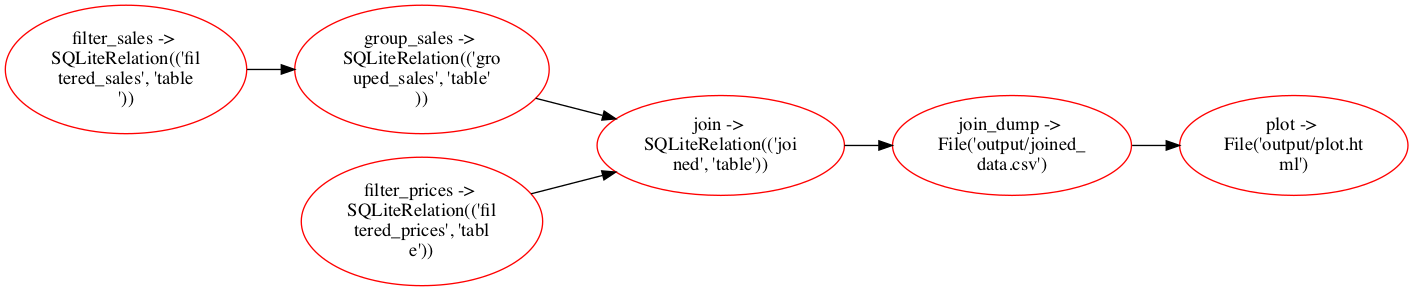

In [3]:
from IPython.display import Image
Image(filename='pipeline.png')

Otherwise, open the `pipeline.png` file directly.

## Build

In [4]:
%%bash
ploomber build

name           Ran?      Elapsed (s)    Percentage
-------------  ------  -------------  ------------
filter_sales   True         0.00575      0.135495
filter_prices  True         0.001318     0.0310577
group_sales    True         0.001483     0.0349458
join           True         0.001602     0.03775
join_dump      True         0.002283     0.0537973
plot           True         4.23128     99.707


Building task 'plot': 100%|██████████| 6/6 [00:04<00:00,  1.40it/s]


The final output is a report: [output/plot.html](output/plot.html).